This notebook is for making overview plots of the whole deployment, using the daily files that include data downsampled to 60-s sampling interval (created using '20_plot_daily_pickles')

In [1]:
import header
paths = header.setup_environment()
import os
import datetime
import obspy


**********
 Baro 100 

2 Trace(s) in Stream:
Ai.rPres.su.reD | 2022-07-21T13:54:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192631 samples
Ai.rPres.su.reS | 2022-07-21T13:54:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192631 samples


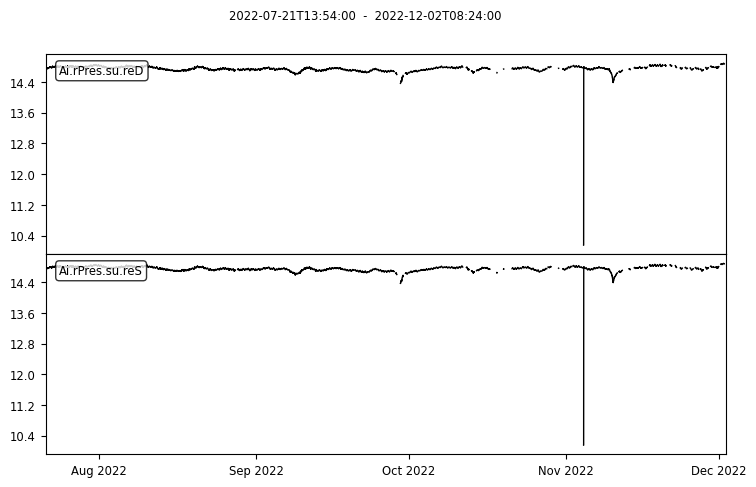


**********
 Sensors 1 

6 Trace(s) in Stream:
12.26423..      | 2022-07-21T13:47:00.000000Z - 2022-08-26T08:26:00.000000Z | 60.0 s, 51520 samples
21.51692..      | 2022-07-21T13:47:00.000000Z - 2022-08-26T08:26:00.000000Z | 60.0 s, 51520 samples
Dy.nStdD.ev.(1) | 2022-07-21T13:47:00.000000Z - 2022-08-26T08:26:00.000000Z | 60.0 s, 51520 samples
Dy.nStdD.ev.(2) | 2022-07-21T13:47:00.000000Z - 2022-08-26T08:26:00.000000Z | 60.0 s, 51520 samples
Th.erm(1.).     | 2022-07-21T13:47:00.000000Z - 2022-08-26T08:26:00.000000Z | 60.0 s, 51520 samples
Th.erm(2.).     | 2022-07-21T13:47:00.000000Z - 2022-08-26T08:26:00.000000Z | 60.0 s, 51520 samples


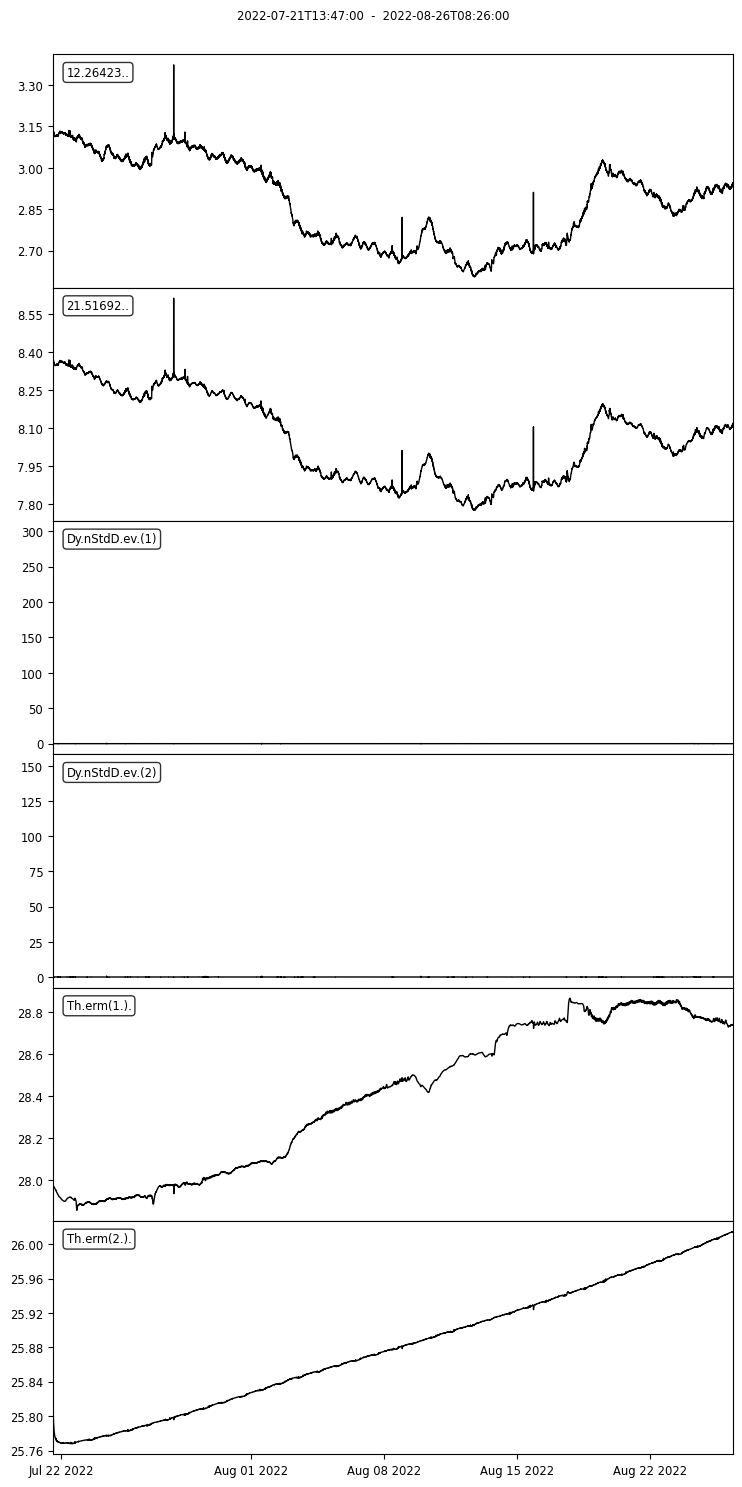


**********
 Sensors 20 

2 Trace(s) in Stream:
12.26423.. | 2022-07-21T13:47:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192638 samples
21.51692.. | 2022-07-21T13:47:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192638 samples


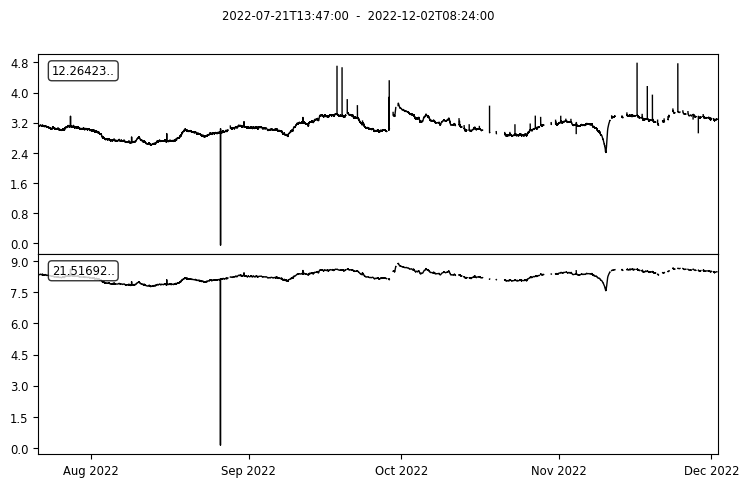


**********
 Sensors 100 

6 Trace(s) in Stream:
12.26419.. | 2022-07-21T16:00:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192505 samples
12.26420.. | 2022-07-21T16:00:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192505 samples
12.26421.. | 2022-07-21T16:00:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192505 samples
12.26429.. | 2022-07-21T16:00:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192505 samples
21.49882.. | 2022-07-21T16:00:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192505 samples
21.51691.. | 2022-07-21T16:00:00.000000Z - 2022-12-02T08:24:00.000000Z | 60.0 s, 192505 samples


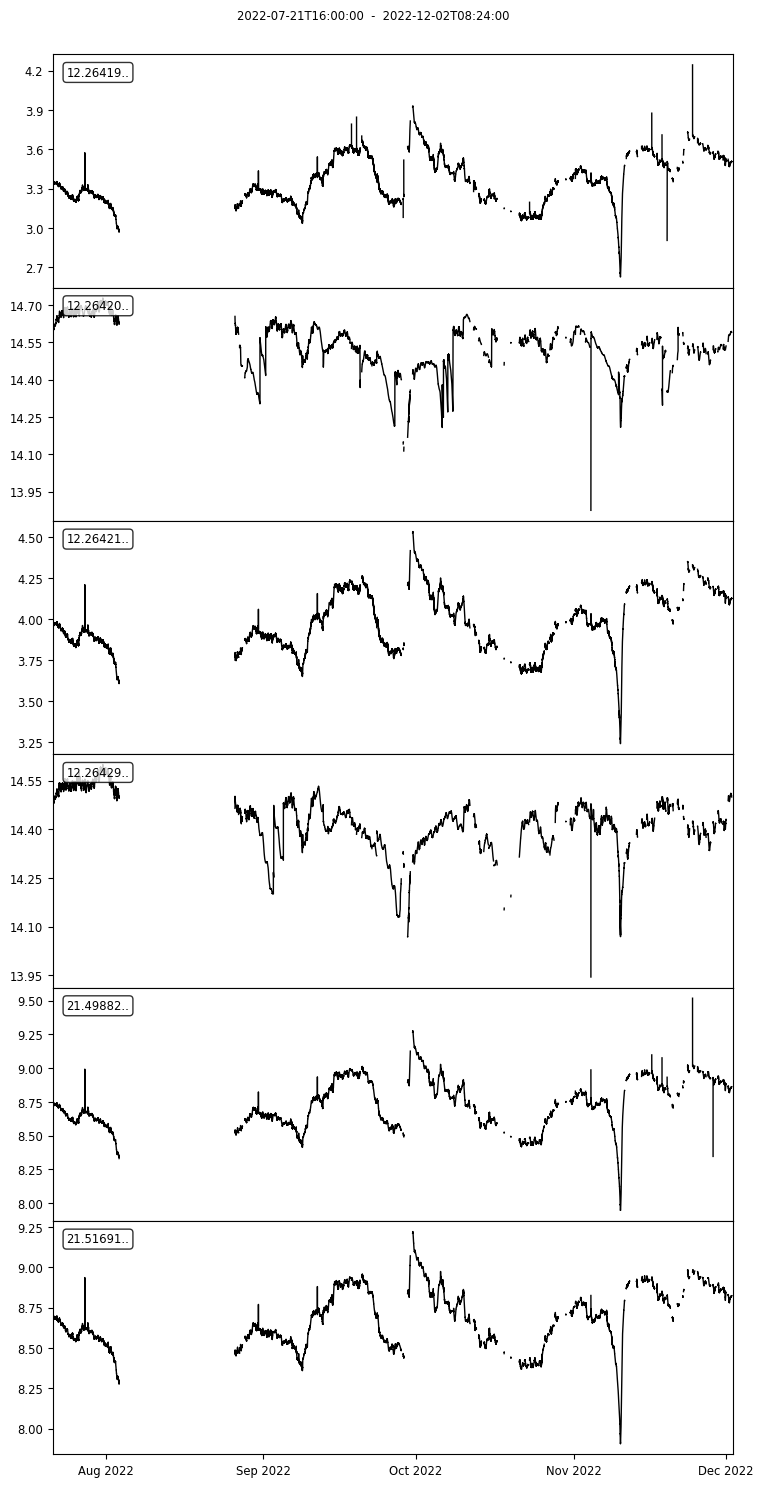

In [16]:
import numpy as np
MSEED_DIR = os.path.join(paths['CORRECTED'], 'daily60s')
instrumentsList = ['Baro', 'Sensors', 'Sensors', 'Sensors']
fsList = [100, 1, 20, 100]
new_interval = 60
start_dt = datetime.datetime(2022,7,21,0,0,0)
end_dt = datetime.datetime(2022,12,3,0,0,0)


for instrumentIndex, instruments in enumerate(instrumentsList):
    fs = fsList[instrumentIndex]
    st_all = obspy.Stream()
    print('\n**********\n',instruments,fs,'\n')
    this_dt = start_dt
    while this_dt < end_dt:
        that_dt = this_dt + datetime.timedelta(days=1)
        mseedfile = f"{this_dt.strftime('%Y%m%d')}_{instruments}_{fs}Hz_to_{new_interval}s.mseed"
        mseedpath = os.path.join(MSEED_DIR, mseedfile)
        if os.path.isfile(mseedpath):
            #print('Reading ',mseedpath)
            st = obspy.read(mseedpath)
            st_all = st_all + st
            st_all.merge()
            #print(st_all)
        else:
            #print(mseedpath,' not found')
            pass
        this_dt = that_dt
    if len(st_all)>0:
        mseedfileall = f"{instruments}_{fs}Hz_to_{new_interval}s.mseed"
        mseedpathall = os.path.join(MSEED_DIR, mseedfileall)
        #print(mseedpathall)
        for tr in st_all:
            if isinstance(tr.data, np.ma.masked_array):
                #tr.data = tr.data.filled(fill_value=np.nanmedian(tr.data))
                tr.data = tr.data.filled(fill_value=np.nan)
        print(st_all)
        #st_all.write(mseedpathall, format='MSEED')
        st_all.plot(equal_scale=False)
    
